In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pol_lagrange(u,k,x): #u:punti in cui valutare f, k:ordine del polinomio,
                         #x:nodi di interpolazione
    nint = len(x)
    n = len(np.array([u]))
    if np.isscalar(u):
        I = np.hstack((np.arange(0,k),np.arange(k+1,nint)))
        w_k = np.cumprod((u-x[I])/(x[k]-x[I]))[-1]
    elif isinstance(u,np.ndarray):      
        w_k = np.ones(len(np.array([u])))
        for j in np.hstack((np.arange(0,k),np.arange(k+1,nint))):
            w_k = (u-x[j])/(x[k]-x[j]) * w_k
    else:
        print("errore: 'u' ha un tipo non previsto !")
    return w_k

def interpol_lagrange(u,x,f): #f:funzione da interpolare
    nint = len(x)
    n = u.size
    v = np.zeros(n)
    y = f(x)
    for k in range(nint):
        w_k = pol_lagrange(u,k,x)
        v = v + w_k * y[k]
    return v

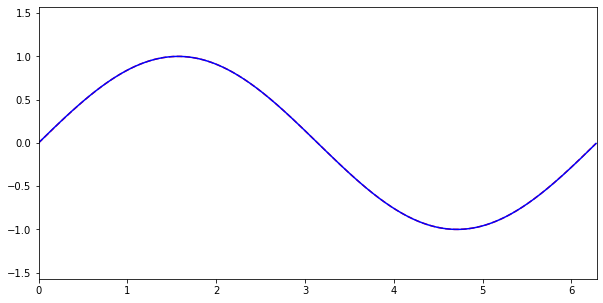

In [3]:
f_a = lambda x : np.sin(x)
u_a = np.arange(0,2*pi,2*pi/1000) #punti in cui valutare la funzione
x_1 = np.arange(0,2*pi+0.1,2*pi/3) #4 nodi equispaziati
x_2 = np.arange(0,2*pi+0.1,2*pi/7) #8 nodi equispaziati

plt.figure(figsize=(10,5))
plt.plot(u_a,f_a(u_a),'r--')
plt.plot(u_a,interpol_lagrange(u_a,x_1,f_a),'b-')
plt.axis([0,2*pi,-pi*0.5,pi*0.5])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(u_a,f_a(u_a),'r--')
plt.plot(u_a,interpol_lagrange(u_a,x_2,f_a),'b-')
plt.axis([0,2*pi,-pi*0.5,pi*0.5])
plt.show()

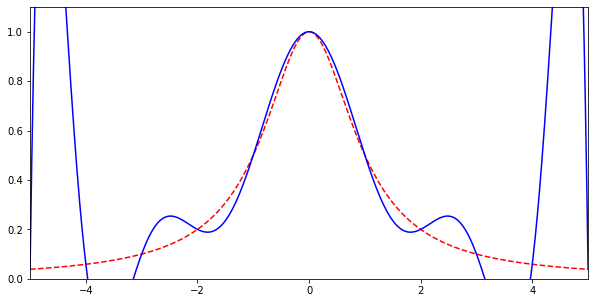

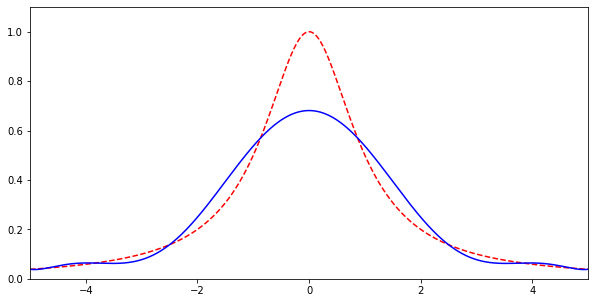

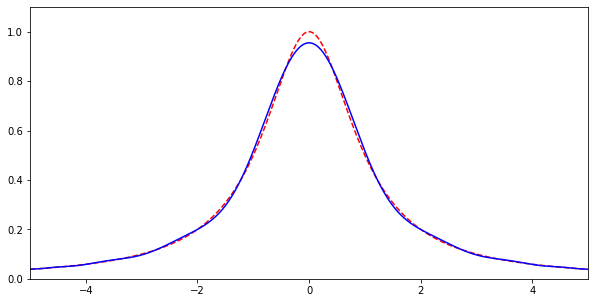

In [4]:
f_b = lambda x : 1./(1.+x**2)
u_b = np.arange(-5,5.005,0.01)
nope = np.arange(-5,5.005,1) #10 nodi equispaziati
x_3 = 5*np.cos(pi*np.arange(0,10)/9) #zeri di Chebychev
x_4 = 5*np.cos(pi*np.arange(0,20)/19) #zeri di Chebychev

plt.figure(figsize=(10,5))
plt.plot(u_b,f_b(u_b),'r--')
plt.plot(u_b,interpol_lagrange(u_b,nope,f_b),'b-')
plt.axis([-5,5,0,1.1])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(u_b,f_b(u_b),'r--')
plt.plot(u_b,interpol_lagrange(u_b,x_3,f_b),'b-')
plt.axis([-5,5,0,1.1])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(u_b,f_b(u_b),'r--')
plt.plot(u_b,interpol_lagrange(u_b,x_4,f_b),'b-')
plt.axis([-5,5,0,1.1])
plt.show()